In [1]:
import sys; sys.path.insert(0, '..')
import cmdp.ch_parser as ch_parser
import cmdp.NYCtools as NYCtools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

NYCstreetnetwork.json contains a stochastic energy consumption model covering all the streets in central Manhattan, New York City. The reload states are all the electric charging stations in the area and the energy consumption is based on real-world data. The target states are generated randomly from the states forming the Markov decision process. In this case, we have 7378 states in the MDP and 100 randomly selected target states.

In [2]:
m, targets = ch_parser.parse('NYCstreetnetwork.json')

We calculate the computation time for calculating the energy levels needed to reach some target within > 0 steps for scenarios when the agent capacity is equal to 30.

In [3]:
%%timeit
m.get_minInitCons(recompute=True);

362 ms ± 4.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
m.get_minInitCons(30, recompute=True);

185 ms ± 5.63 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We proceed to calculate the computation time for calculating the energy levels needed to survive with a capacity of 100.

In [5]:
%%timeit
m.get_safe(100, recompute=True)

992 ms ± 28.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We also calculate the computational time taken for calculating the energy levels needed for positive reachability, almost sure reachability, and Buchi objectives for a given set of targets and a capacity of 100. We note that the time scales we obtained for the computational time on a large realistic graph are satisfactory. 

In [6]:
%%timeit
m.get_positiveReachability(targets, 100, recompute=True)

1.33 s ± 34.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
m.get_almostSureReachability(targets, 100, recompute=True)

2 s ± 6.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
m.get_Buchi(targets, 100, recompute=True)

1.35 s ± 9.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Now we focus on obtaining a strategy using the 'EnergySolver' variant for computing the safe vector. Note that the difference between computational time can vary a lot and is analyzed in different example notebooks.

In [3]:
from cmdp.energy_solver import *

In [10]:
%%timeit
s = EnergySolver(m, cap=100, targets=targets)
strategy = s.get_strategy(BUCHI, recompute=True)

1.35 s ± 5.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
s = EnergySolver(m, cap=100, targets=targets)
strategy = s.get_strategy(AS_REACH, recompute=True)

2 s ± 8.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We now analyze how the computational time varies for different target sets. The function 'timeit_difftargets()' calculates the computational time of computing the strategy with Buchi objective for 'num_samples' different randomly generated target sets. The resulting compute time is plotted as a histogram as shown below. We consider a capacity of 200 and target set size of 100 for this analysis.

Text(0.5, 1.0, 'Histogram of Buchi Computational Time. Mean: 1.552 and SD: 0.1195')

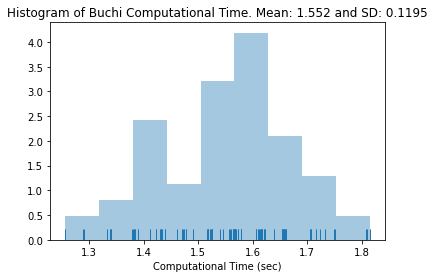

In [12]:
comptime = NYCtools.timeit_difftargets(m, cap=200, target_size = 100, num_samples=100, obj=BUCHI)
sns.distplot(list(comptime), kde=False, norm_hist=True, rug=True, axlabel='Computational Time (sec)').set_title('Histogram of Buchi Computational Time. Mean: {} and SD: {}'.format(round(np.mean(comptime),4), round(np.std(comptime),4)))

We now perform the same analysis as above but with a reduced target set size, i.e., each of the randomly generated target set has only 50 states in it (instead of 100 as above). All the other parameters remain the same.

Text(0.5, 1.0, 'Histogram of Buchi Computational Time. Mean: 1.6949 and SD: 0.1504')

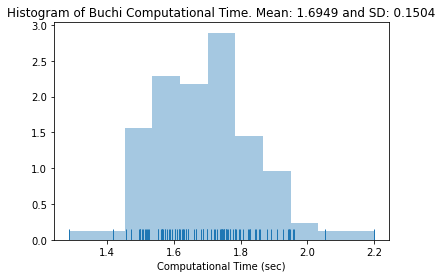

In [13]:
comptime = NYCtools.timeit_difftargets(m, cap=200, target_size = 50, num_samples=100, obj=BUCHI)
sns.distplot(list(comptime), kde=False, norm_hist=True, rug=True, axlabel='Computational Time (sec)').set_title('Histogram of Buchi Computational Time. Mean: {} and SD: {}'.format(round(np.mean(comptime),4), round(np.std(comptime),4)))

We now analyze the variation of computational time for different capacities. The task is to generate a strategy with Buchi objective, same as the above experiments. We consider a maximum value of capacity 'cap_bound' and split the interval [0, cap_bound] into 'num_samples' no.of intervals and use the interval bounds as the different values of capacities we calculate computational time for. Further, for each capacity value, we repeat the test multiple times to account for variations in the computational time.

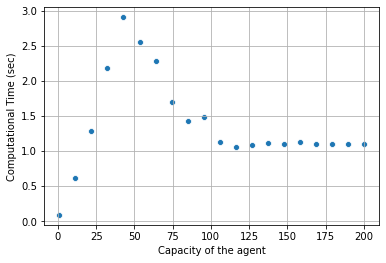

In [14]:
comptime = NYCtools.timeit_diffcaps(m, targets, cap_bound = 200, num_samples = 20, num_tests=10, obj=BUCHI)
x_val = [pair[0] for pair in comptime]; y_val = [pair[1] for pair in comptime]
ax = sns.scatterplot(x_val, y_val)
ax.set_xlabel('Capacity of the agent'); ax.set_ylabel('Computational Time (sec)'); ax.grid(True)

Now, we analyize how the computational time changes with the size of the targets. We randomly generate target sets of different sizes and calculate the computational time for the same capacity for Buchi objective.

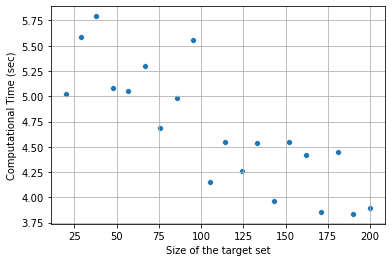

In [4]:
comptime = NYCtools.timeit_difftargetsizes(m, cap=50, size_bound = 200, num_samples = 20, num_tests=10, obj=BUCHI)
x_val = [pair[0] for pair in comptime]; y_val = [pair[1] for pair in comptime]
ax = sns.scatterplot(x_val, y_val)
ax.set_xlabel('Size of the target set'); ax.set_ylabel('Computational Time (sec)'); ax.grid(True)